Autores: Alexandre Liermann, Gustavo Guerreiro e João Martinho.

# Implementação de Classificação de Imagens de Ressonância Magnética para Diagnóstico de Alzheimer Usando CNN em TensorFlow

Importações das bibliotecas necessárias

In [179]:
import tensorflow as tf
import pathlib

Definindo os diretórios do dataset

In [180]:
dir_dados = pathlib.Path('Dataset Alzheimer Sem Moderate')
dir_treino = dir_dados / 'train'
dir_teste = dir_dados / 'test'

Carregando os imagens automaticamente para o TensorFlow.

In [181]:
img_height = 176
img_width = 208
batch_size = 32

dataset_treino = tf.keras.utils.image_dataset_from_directory(
    dir_treino,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

dataset_teste = tf.keras.utils.image_dataset_from_directory(
    dir_teste,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

print('Classes encontradas:', dataset_treino.class_names)

Found 5069 files belonging to 3 classes.
Found 1267 files belonging to 3 classes.
Classes encontradas: ['MildDemented', 'NonDemented', 'VeryMildDemented']


Normalizando a imagem para ficar mais natural para a CNN.

In [182]:
def normalizar_img(imagem, rotulo):
    imagem = tf.cast(imagem, tf.float32) / 255.0
    return imagem, rotulo

dataset_treino = dataset_treino.map(normalizar_img)
dataset_teste = dataset_teste.map(normalizar_img)

Configurando operações de cache e prefetch para aprimorar desempenho.

In [183]:
from tensorflow.data import AUTOTUNE

dataset_treino = dataset_treino.cache().shuffle(800).prefetch(buffer_size=AUTOTUNE)
dataset_teste = dataset_teste.cache().prefetch(buffer_size=AUTOTUNE)

Fazendo data augmentation.

In [184]:
# from tensorflow.keras import layers
#
# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
# ])
#
# dataset_treino = dataset_treino.map(lambda x, y: (data_augmentation(x, training=True), y))

Isolando luminância.

In [185]:
def isolar_luminancia(imagem, rotulo):
    imagem = tf.image.rgb_to_grayscale(imagem)
    return imagem, rotulo

dataset_treino = dataset_treino.map(isolar_luminancia)
dataset_teste = dataset_teste.map(isolar_luminancia)

Iniciando a configuração do modelo.

In [186]:
from tensorflow.keras import models, layers

modelo = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_height, img_width, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation='relu'),

    layers.Flatten(),
    # layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax'),
])


C:\Users\guto_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilando o modelo com a definição de otimizador (Adaptive Moment Estimation), perda e métricas.

In [187]:
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Definindo callback de EarlyStopping.

In [188]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

Treinando o modelo

In [ ]:
history = modelo.fit(
    dataset_treino,
    validation_data=dataset_teste,
    epochs=15,
    callbacks=[early_stop]
)

Epoch 1/15
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.5179 - loss: 1.0510 - val_accuracy: 0.5099 - val_loss: 0.9616
Epoch 2/15
  2/159 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.5938 - loss: 0.8361

Avaliando os resultados do treino

In [177]:
perda, acuracia = modelo.evaluate(dataset_teste)

print(f"Acurácia: {acuracia:.2f}")
print(f"Perda: {perda:.2f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5746 - loss: 0.8863
Acurácia: 0.57
Perda: 0.89


Métricas mais avançadas com sklearn

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

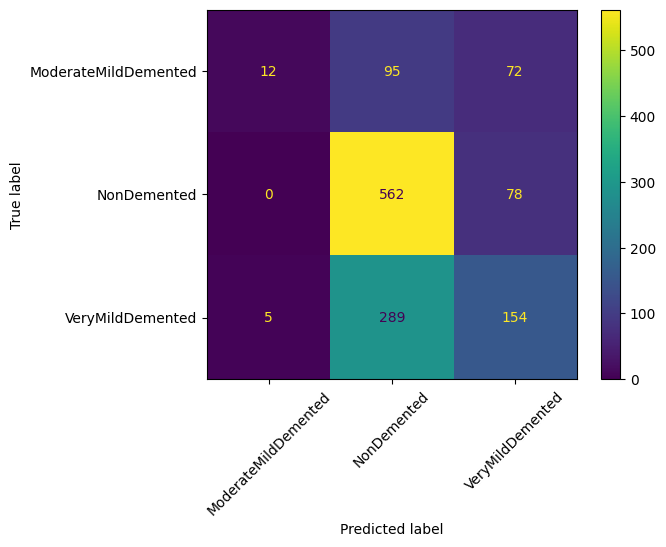

In [178]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from matplotlib import pyplot as plt

y_verdadeiro = []
y_previsto = []

for imagens, rotulos in dataset_teste:
    previsoes = modelo.predict(imagens)
    y_verdadeiro.extend(rotulos.numpy())
    y_previsto.extend(np.argmax(previsoes, axis=1))

classes = ['ModerateMildDemented', 'NonDemented', 'VeryMildDemented']
cm = confusion_matrix(y_verdadeiro, y_previsto)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(xticks_rotation=45)
plt.show()